# Imports

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

from sklearn.metrics import homogeneity_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.decomposition import NMF

import numpy as np
import pandas as pd   
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np 
np.random.seed(42) 
import random 
random.seed(42)

## QUESTION 1: Report the dimensions of the TF-IDF matrix you get.

In [3]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
                      'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
                      'rec.autos', 'rec.motorcycles',
                      'rec.sport.baseball', 'rec.sport.hockey']

dataset = fetch_20newsgroups(subset = 'all', categories = categories, shuffle = True, random_state = 42)


Bin_Target = [int(i > 3) for i in dataset.target]
count_vect = CountVectorizer(min_df=3, stop_words='english')
X_train_counts = count_vect.fit_transform(dataset.data)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_train_counts)

print("X_train_tfidf size: ", X_tfidf.shape)



('X_train_tfidf size: ', (7882, 27768))


## QUESTION 2: Report the contingency table of your clustering result.

In [4]:
kmeans = KMeans(n_clusters=2,  n_init=30, max_iter=1000,  random_state=0).fit(X_tfidf) #change n_init = 30
pred = kmeans.predict(X_tfidf)

print(contingency_matrix(Bin_Target, pred))

[[   4 3899]
 [1718 2261]]


## QUESTION 3: Report the 5 measures above for the K-means clustering results you get.

In [5]:
## Question 3: Report the 5 measures above for the K-means clustering results you get.
def print_metrics_and_return(Bin_Target, pred):
    m1 = (homogeneity_score(Bin_Target, pred))
    m2 = (v_measure_score(Bin_Target, pred))
    m3 = (completeness_score(Bin_Target, pred))
    m4 = (adjusted_rand_score(Bin_Target, pred))
    m5 = (adjusted_mutual_info_score(Bin_Target, pred))
    my_list = list([m1, m2, m3, m4, m5])
    my_formatted_list = ['%.8f' % elem for elem in my_list]
    return my_list
  
print(print_metrics_and_return(Bin_Target, pred))

[0.2535958928926043, 0.28860033608397917, 0.334815748824373, 0.18076179588914554, 0.25352755133060884]


## QUESTION 4: Report the plot of the percent of variance the top r principle components can retain v.s. r, for r = 1 to 1000.

In [6]:
tsvd = TruncatedSVD(n_components=1000, n_iter= 30, random_state=0).fit(X_tfidf) #n_init = 30
X_shrunk = tsvd.transform(X_tfidf)
#print(X_shrunk)
print(tsvd.explained_variance_ratio_)
A = [(tsvd.explained_variance_ratio_[0:i]).sum() for i in range(1, 1001)]

[0.00119855 0.00516645 0.00364295 0.003559   0.00320919 0.00255188
 0.00249447 0.00241068 0.00231247 0.00218292 0.00215683 0.00209896
 0.00203723 0.00199506 0.00197322 0.00192575 0.00191031 0.00186392
 0.00184037 0.00180183 0.00177212 0.00171432 0.00168549 0.00166787
 0.00165617 0.00164475 0.00159955 0.00158992 0.0015745  0.00155278
 0.00153817 0.00151933 0.001502   0.00148175 0.00146811 0.00146077
 0.00145667 0.00144085 0.00142557 0.0013985  0.00139369 0.0013824
 0.00136638 0.00135514 0.00133396 0.00133234 0.00131945 0.00130535
 0.00130213 0.00129434 0.00128594 0.00128268 0.00126779 0.00124944
 0.00124207 0.00123807 0.00123119 0.00122581 0.0012214  0.00121293
 0.00120181 0.00119331 0.00118945 0.00117453 0.00117174 0.00115404
 0.00115361 0.00114778 0.00113939 0.0011336  0.00113009 0.00112352
 0.00111113 0.00110772 0.00110125 0.0010969  0.00108742 0.00108537
 0.00107808 0.00107533 0.0010714  0.00106348 0.00105566 0.00105404
 0.00105125 0.00104463 0.00104291 0.00104001 0.00103304 0.00103

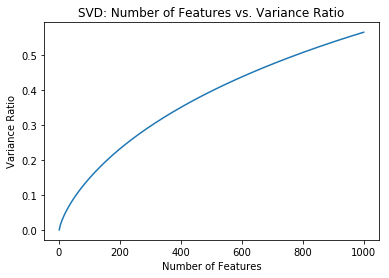

In [7]:
#print(A)
plt.plot([i for i in range(1,1001)],A)
plt.xlabel("Number of Features")
plt.ylabel("Variance Ratio")
plt.title('SVD: Number of Features vs. Variance Ratio')

plt.show()

## QUESTION 5: Let r be the dimension that we want to reduce the data to (i.e. n_components).
#### Try r = 1, 2, 3, 5, 10, 20, 50, 100, 300, and plot the 5 measure scores v.s. r for both SVD and NMF. Report the best r choice for SVD and NMF respectively.


In [8]:
def collect_metrics_svd_nmf(X_train_tfidf, X_test_tfidf):
    metrics_svd = []
    metrics_nmf = []

    for i in [1,2,3,5,10,20,50,100,300]:
        t_svd = TruncatedSVD(n_components=i, n_iter=7, random_state=42)
        t_nmf = NMF(n_components=i, random_state=0)

        X_svd = t_svd.fit_transform(X_tfidf)
        X_nmf = t_nmf.fit_transform(X_tfidf)

        kmeans_svd = KMeans(n_clusters=2,  n_init=30, max_iter=1000,  random_state=0).fit(X_svd) # change n_init to 30
        kmeans_nmf = KMeans(n_clusters=2,  n_init=30, max_iter=1000,  random_state=0).fit(X_nmf) # change n_init to 30

        pred_svd = kmeans_svd.predict(X_svd)
        pred_nmf = kmeans_nmf.predict(X_nmf)


        metrics_svd.append(print_metrics_and_return(Bin_Target, pred_svd))
        metrics_nmf.append(print_metrics_and_return(Bin_Target, pred_nmf))


        print("SVD metrics for " + str(i) + " components:" + str(print_metrics_and_return(Bin_Target, pred_svd)))
        print("NMF metrics for " + str(i) + " components:" + str(print_metrics_and_return(Bin_Target, pred_nmf)))
        print()
        
    return metrics_svd, metrics_nmf

metrics_svd, metrics_nmf = collect_metrics_svd_nmf(X_tfidf, X_tfidf)

SVD metrics for 1 components:[0.0003003030178761853, 0.0003025194525487269, 0.0003047688479979988, 0.00033904080274629444, 0.00020877974994934834]
NMF metrics for 1 components:[0.0003003030178761853, 0.0003025194525487269, 0.0003047688479979988, 0.00033904080274629444, 0.00020877974994934834]
()
SVD metrics for 2 components:[0.5941560927251223, 0.5947513793444834, 0.5953478599987454, 0.6951813413391709, 0.5941189375753546]
NMF metrics for 2 components:[0.6790483562300399, 0.6795895510492934, 0.680131609210451, 0.7770177788377391, 0.6790189730005426]
()
SVD metrics for 3 components:[0.4181197864689728, 0.4346262513408583, 0.4524895605598549, 0.42089607579584704, 0.41806651361113784]
NMF metrics for 3 components:[0.22934270331135687, 0.2659572773735104, 0.3164839569386385, 0.15279745011356483, 0.2292721394788808]
()
SVD metrics for 5 components:[0.2211714158909093, 0.2580081481753665, 0.3095675014972602, 0.1445761383058761, 0.22110010332338415]
NMF metrics for 5 components:[0.18063068581

In [9]:
print("SVD specs: (rows: per r | cols: per metric) \n", np.array(metrics_svd).round(3))
print("NMF specs: (rows: per r | cols: per metric) \n", np.array(metrics_nmf).round(3))

('SVD specs: (rows: per r | cols: per metric) \n', array([[0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.594, 0.595, 0.595, 0.695, 0.594],
       [0.418, 0.435, 0.452, 0.421, 0.418],
       [0.221, 0.258, 0.31 , 0.145, 0.221],
       [0.233, 0.269, 0.32 , 0.156, 0.233],
       [0.236, 0.272, 0.322, 0.159, 0.235],
       [0.241, 0.277, 0.326, 0.167, 0.241],
       [0.246, 0.282, 0.33 , 0.171, 0.246],
       [0.242, 0.279, 0.327, 0.167, 0.242]]))
('NMF specs: (rows: per r | cols: per metric) \n', array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.679,  0.68 ,  0.68 ,  0.777,  0.679],
       [ 0.229,  0.266,  0.316,  0.153,  0.229],
       [ 0.181,  0.219,  0.279,  0.102,  0.181],
       [ 0.189,  0.228,  0.286,  0.11 ,  0.189],
       [ 0.183,  0.218,  0.27 ,  0.114,  0.183],
       [ 0.003,  0.006,  0.101, -0.   ,  0.003],
       [ 0.002,  0.004,  0.062, -0.   ,  0.002],
       [ 0.   ,  0.   ,  0.002,  0.   , -0.   ]]))


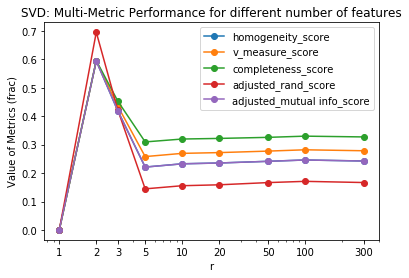

In [10]:
def plot_metrics(metrics_svd, title):
    r = [1,2,3,5,10,20,50,100,300]
    leg = ["homogeneity_score", "v_measure_score", "completeness_score", 
               "adjusted_rand_score", "adjusted_mutual info_score"]
    for i in range(0,5):
        plt.plot(r, np.array(metrics_svd)[:,i], "o-", label = leg[i])

    plt.xlabel("r")
    plt.ylabel("Value of Metrics (frac)")
    plt.title(title)
    plt.xscale("log")
    plt.xticks(r, r)

    plt.legend()
    plt.show()
    
title = "SVD: Multi-Metric Performance for different number of features"
plot_metrics(metrics_svd, title)

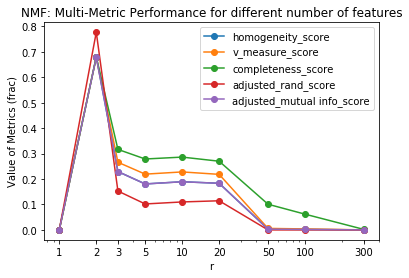

In [11]:
title = "NMF: Multi-Metric Performance for different number of features"
plot_metrics(metrics_nmf, title)

**SVD metrics for 2 components**: (0.4710480156027712, 0.4758037081256431, 0.480656406797888, 0.5441741710905493, 0.47092679039471597)

**NMF metrics for 2 components**: (0.6161630172891465, 0.6211924319537296, 0.6263046272468354, 0.6874855277107061, 0.616075049842405)

## QUESTION 6: How do you explain the non-monotonic behavior of the measures as r increases?

For a smaller number of features, we underfit to the binary clustering samples, losing out on accuracy to correctly bin predicted label to true label (i.e the implicit loss in variance results in poorer classification). For an excessive number of features, the model is overfitted to features that DO NOT distinguish between the labels. Their contribution to the Euclidian distance measure in the K-Means algorithm can considerably offset the distances of all training points, making those features with high variance and smaller distance measure irrelevant in the clustering. This results in loss of accuracy. Thus we observed the non-monotonic behavior of measures as r increases.

## QUESTION 7: Visualize the clustering results for:
 *   SVD with its best r  
 *   NMF with its best r


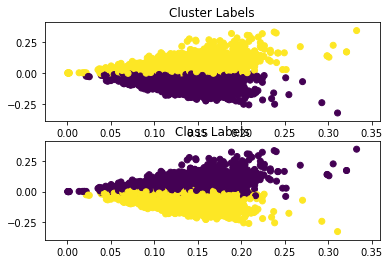

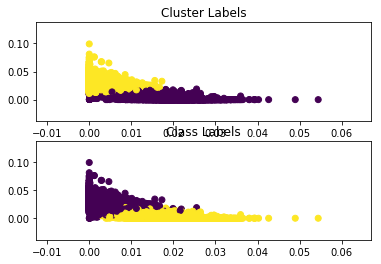

In [12]:

def plotKmeans(X_svd_r,y_plot, Bin_target_Test,best_r):

    if best_r > 2:
        svdplot = TruncatedSVD(n_components=2, random_state=0).fit(X_svd_r)
        X_plot = svdplot.transform(X_svd_r)
    else:
        X_plot = X_svd_r

    plt.subplot(2,1,1)
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot)
    plt.title("Cluster Labels")
    plt.subplot(2,1,2)
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=Bin_target_Test)
    plt.title("Class Labels")
    plt.show()

best_r_svd = 2
best_r_nmf = 2
t_svd = TruncatedSVD(n_components=best_r_svd, n_iter=7, random_state=0)
t_nmf = NMF(n_components=best_r_nmf, init='random', random_state=0)


X_svd = t_svd.fit_transform(X_tfidf)
X_nmf = t_nmf.fit_transform(X_tfidf)

kmeans_svd = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0).fit(X_svd)  # change n_init to 30
kmeans_nmf = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0).fit(X_nmf)  # change n_init to 30

pred_svd = kmeans_svd.predict(X_svd)
pred_nmf = kmeans_nmf.predict(X_nmf)

plotKmeans(X_svd,pred_svd,Bin_Target,best_r_svd)

plotKmeans(X_nmf,pred_nmf,Bin_Target,best_r_nmf)

##QUESTION 8: Visualize the transformed data as in part (a).

Metrics for SVD
SVD Log
[0.6094166425300774, 0.6094002960771852, 0.6093839505011949, 0.7165020097599525, 0.6093481914115698]


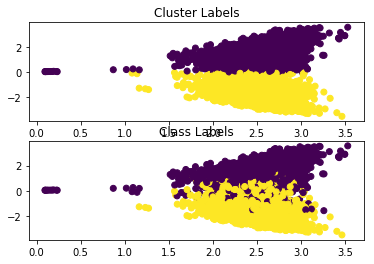

()
SVD Scale
[0.2353190059031418, 0.2487520767881836, 0.26381163556564485, 0.2546253962601237, 0.23524899610477296]


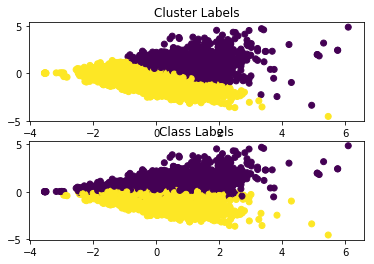

()
SVD Scale followed by Log
[7.413801393166482e-05, 7.421823410387375e-05, 7.429862806673192e-05, -1.3196858626130123e-05, -1.740554898676144e-05]


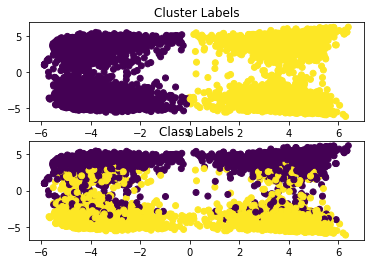

()
SVD Log followed by Scale
[0.6095947774726546, 0.609574462499973, 0.6095541488812544, 0.7165020095866556, 0.6095184058375314]


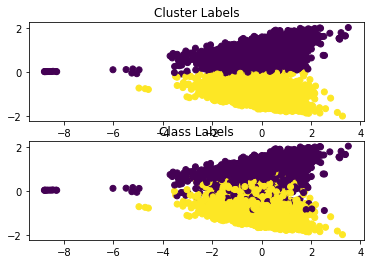

----------------------------------------------------------------------
Metrics for NMF
NMF Log
[0.7008978537788074, 0.7015460207584749, 0.7021953876542337, 0.7950170594682267, 0.7008704708755917]


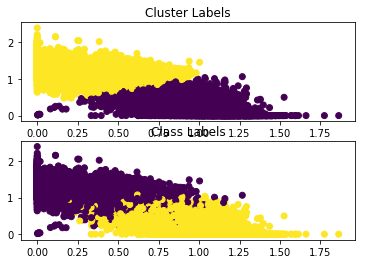

()
NMF Scale
[0.6828038321574016, 0.6842219522524521, 0.6856459752144646, 0.7734426774605906, 0.6827747927166996]


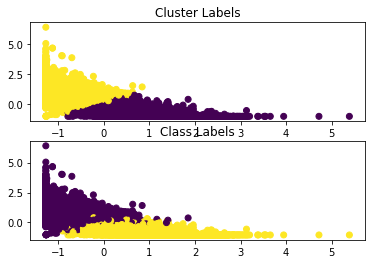

()
NMF Scale followed by Log
[0.6929088340399085, 0.6939507688845907, 0.6949958419867088, 0.7850919684094579, 0.6928807197277213]


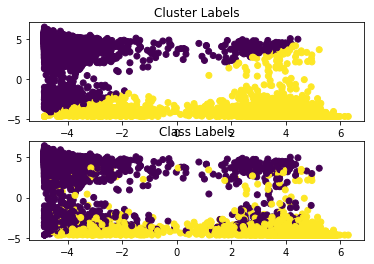

()
NMF Log followed by Scale
[0.7029330839809769, 0.703512018634563, 0.7040919076936536, 0.7972814558331544, 0.7029058874057212]


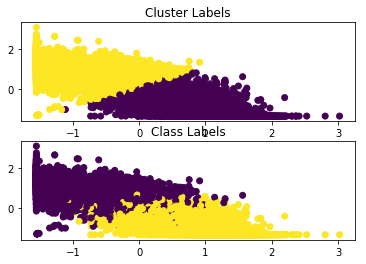

(0, 0, 0, 0, 0)

In [13]:
def scalingfeatures(X):
    X_scaled = preprocessing.scale(X, axis=0, with_mean=True, with_std=True)
    return X_scaled


def logscale(X, c):
    X_sign = np.sign(X)
    X_abs = np.absolute(X)
    return X_sign * (np.log(X_abs + c) - np.log(c))


def scalingmetric(X, Target, c, best_r, scale=0, log=0, order=0, flag=False, n_cluster_flex=2):
    if order == 0:
        if scale == 0:
            X_1 = scalingfeatures(X)
        else:
            X_1 = X

        if log == 0:
            X_2 = logscale(X_1, c)
        else:
            X_2 = X_1

    else:
        X_1 = logscale(X, c)
        X_2 = scalingfeatures(X_1)

    kmeans = KMeans(n_clusters=n_cluster_flex, n_init=30, max_iter=1000, random_state=0).fit(
        X_2)
    pred = kmeans.predict(X_2)
    # print pred
    # print Bin_Target_Test

    if flag == True:
        print(print_metrics_and_return(Target, pred))
        plotKmeans(X_2, pred, Target, best_r)

    if flag == False:
        # print print_metrics_and_return(Bin_Target_Test, pred)
        return print_metrics_and_return(Target, pred)
    else:
        return 0, 0, 0, 0, 0

print('Metrics for SVD')

print('SVD Log')
scalingmetric(X_svd,Bin_Target,0.01,2, 1, 0, 0,flag=True)
print()
print('SVD Scale')
scalingmetric(X_svd,Bin_Target,0.01,2, 0, 1, 0,flag=True)
print()
print('SVD Scale followed by Log')
scalingmetric(X_svd,Bin_Target,0.01,2, 0, 0, 0,flag=True)
print()
print('SVD Log followed by Scale')
scalingmetric(X_svd,Bin_Target,0.01,2, 0, 0, 1,flag=True)

print('-'*70)

print('Metrics for NMF')

print('NMF Log')
scalingmetric(X_nmf,Bin_Target,0.01,2, 1, 0, 0,flag=True)
print()
print('NMF Scale')
scalingmetric(X_nmf,Bin_Target,0.01,2, 0, 1, 0,flag=True)
print()
print('NMF Scale followed by Log')
scalingmetric(X_nmf,Bin_Target,0.01,2, 0, 0, 0,flag=True)
print()
print('NMF Log followed by Scale')
scalingmetric(X_nmf,Bin_Target,0.01,2, 0, 0, 1,flag=True)


## QUESTION 9: Why is the Logarithmic Transformation Useful?

The transformation increases the **variability** in feature descriptions for training samples, increasing differences between training points that are close together, and not further increasing the separation of outliers (due to the **concavity** of the log function). This provides greater resolution to the data during training, improving clustering performance.

## Question 11:  Repeat the following for 20 categories using the same parameters as in
2-class case:
*  Transform corpus to TF-IDF matrix
*  Directly perform K-means and report the 5 measures and the contingency matrix

In [14]:
train_dataset_all_cat = fetch_20newsgroups(subset = 'all', shuffle = True, random_state = 42)

count_vect_all = CountVectorizer(min_df=3, stop_words='english')

X_counts_all = count_vect_all.fit_transform(train_dataset_all_cat.data)

tfidf_transformer_all = TfidfTransformer()
X_tfidf_all = tfidf_transformer_all.fit_transform(X_counts_all)


print("X_train_tfidf size: ", X_tfidf_all.shape)



('X_train_tfidf size: ', (18846, 52295))


In [15]:
kmeans_all = KMeans(n_clusters=20,  n_init=30, max_iter=1000, random_state=0).fit(X_tfidf_all)
pred_all = kmeans_all.predict(X_tfidf_all)

In [17]:
print(print_metrics_and_return(train_dataset_all_cat['target'], pred_all))

[0.35942082651801804, 0.4000803165708632, 0.45111242050273204, 0.13663613501490818, 0.35731878968094594]


In [21]:
df3 = pd.DataFrame(contingency_matrix(train_dataset_all_cat['target'], pred_all), index=None)

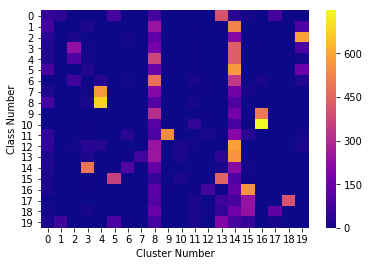

In [25]:
ax = plt.axes()
plasma_2 = sns.heatmap(df3, cmap = 'plasma',ax = ax)
plt.xlabel('Cluster Number')
plt.ylabel('Class Number')
plt.show()